[![GitHub Repo stars](https://img.shields.io/github/stars/speechbrain/speechbrain?style=social) *Please, help our community project. Star on GitHub!*](https://github.com/speechbrain/speechbrain)

# 🚀 **What's New in SpeechBrain 1.0?**

📅 On February 2024, we released [SpeechBrain 1.0](https://speechbrain.github.io/), the result of a year-long collaborative effort by a large international network of developers led by our exceptional core development team.


## 📊 Some Numbers:
 - [SpeechBrain](https://github.com/speechbrain/speechbrain) has evolved into a significant project and stands among the most widely used open-source toolkits for speech processing.
 - Over 140 developers have contributed to our repository, getting more than 7.3k stars on [GitHub](https://github.com/speechbrain/speechbrain).
 - Monthly downloads from [PyPI](https://pypi.org/project/speechbrain/) have reached an impressive 200k.
 - Expanded to over [200 recipes](https://github.com/speechbrain/speechbrain/tree/develop/recipes) for Conversational AI, featuring more than 100 pretrained models on [HuggingFace](https://huggingface.co/speechbrain/).

## 🌟 Key Updates:
- [SpeechBrain 1.0](https://github.com/speechbrain/speechbrain) introduces significant advancements, expanding support for diverse datasets and tasks, including NLP and EEG processing.

- The toolkit now excels in Conversational AI and various sequence processing applications.

- Improvements encompass key techniques in speech recognition, **streamable conformer transducers**, integration with **K2** for **Finite State Transducers**, **CTC decoding** and **n-gram rescoring**, new **CTC/joint attention Beam Search interface**, enhanced compatibility with HuggingFace Models (including GPT2 and Llama2), and refined data augmentation, training, and inference processes.

- We have created a new repository dedicated to **benchmarks**, accessible at [here](https://github.com/speechbrain/benchmarks/). At present, this repository features benchmarks for various domains, including speech self-supervised models ([MP3S](https://github.com/speechbrain/benchmarks/tree/main/benchmarks/MP3S)), continual learning ([CL-MASR](https://github.com/speechbrain/benchmarks/tree/main/benchmarks/CL_MASR)), and EEG processing ([SpeechBrain-MOABB](https://github.com/speechbrain/benchmarks/tree/main/benchmarks/MOABB)).

For detailed technical information, please refer to the section below.

## 🔄 Breaking Changes
People familiar with [SpeechBrain](https://speechbrain.github.io/) know very well that we do our best to avoid backward incompatible changes. While [SpeechBrain](https://github.com/speechbrain/speechbrain) has consistently prioritized maintaining backward compatibility, the introduction of this new major version presented an opportunity for significant enhancements and refactorings.

1. **🤗 HuggingFace Interface Refactor:**
   - Previously, our interfaces were limited to specific models like Whisper, HuBERT, WavLM, and wav2vec 2.0.
   - We've refactored the interface to be more general, now supporting any transformer model from HuggingFace.  
   - Simply inherit from our new interface and enjoy the flexibility.
   - The updated interfaces can be accessed [here](https://github.com/speechbrain/speechbrain/tree/develop/speechbrain/lobes/models/huggingface_transformers).
  

2. **🔍 BeamSearch Refactor:**
   - The previous beam search interface, while functional, was challenging to comprehend and modify due to the combined search and rescoring parts.
   - We've introduced a new interface where scoring and search are separated, managed by distinct functions, resulting in simpler and more readable code.
   - This update allows users to easily incorporate various scorers, including n-gram LM and custom heuristics, in the search part.
   - Additionally, support for pure CTC training and decoding, batch and GPU decoding, partial or full candidate scoring, and N-best hypothesis output with neural LM rescorers has been added.
   - An interface to [K2](https://github.com/k2-fsa/k2) for search based on Finite State Transducers (FST) is now available.
   - The updated decoders are available [here](https://github.com/speechbrain/speechbrain/tree/develop/speechbrain/decoders).

3. **🎨 Data Augmentation Refactor:**
   - The data augmentation capabilities have been enhanced, offering users access to various functions in speechbrain/augment.
   - New techniques, such as *CodecAugment*, *RandomShift (Time)*, *RandomShift (Frequency)*, *DoClip*, *RandAmp*, *ChannelDrop*, *ChannelSwap*, *CutCat*, and *DropBitResolution*, have been introduced.
   - Augmentation can now be customized and combined using the Augmenter interface in speechbrain/augment/augmenter.py, providing more control during training.
   - Take a look [here](https://colab.research.google.com/drive/1JJc4tBhHNXRSDM2xbQ3Z0jdDQUw4S5lr?usp=sharing) for a tutorial on speech augmentation.
   - The updated augmenters are available [here](https://github.com/speechbrain/speechbrain/tree/develop/speechbrain/augment).

4. **🧠 Brain Class Refactor:**
   - The fit_batch method in the Brain Class has been refactored to minimize the need for overrides in training scripts.
   - Native support for different precisions (fp32, fp16, bf16), mixed precision, compilation, multiple optimizers, and improved multi-GPU training with torchrun is now available.
   - Take a look at the  refactored brain class [here](https://github.com/speechbrain/speechbrain/blob/develop/speechbrain/core.py).

5. **🔍 Inference Interfaces Refactor:**
   - Inference interfaces, once stored in a single file (speechbrain/pretrained/interfaces.py), are now organized into smaller libraries in speechbrain/inference, enhancing clarity and intuitiveness.
   - You can access the new inference interfaces [here](https://github.com/speechbrain/speechbrain/tree/develop/speechbrain/inference).

## 🔊 Automatic Speech Recognition
   - Developed a new recipe for training a Streamable Conformer Transducer using Librispeech dataset (accessible [here](https://github.com/speechbrain/speechbrain/tree/develop/recipes/LibriSpeech/ASR/transducer)). The streamable model achieves a Word Error Rate (WER) of 2.72% on the test-clean subset.
   - Implemented a dedicated inference inference to support streamable ASR (accessible [here](https://github.com/speechbrain/speechbrain/blob/develop/speechbrain/inference/ASR.py)).
   - New models, including [HyperConformer](https://arxiv.org/abs/2305.18281) abd [Branchformer](https://arxiv.org/abs/2207.02971)have been introduced. Examples of recipes utilizing them can be found [here](https://github.com/speechbrain/speechbrain/tree/develop/recipes/LibriSpeech/ASR/transformer).
   - Additional support for datasets like [RescueSpeech](https://arxiv.org/abs/2306.04054), [CommonVoice 14.0](https://commonvoice.mozilla.org), AMI, Tedlium 2.
   - The ASR search pipeline has undergone a complete refactoring and enhancement (see comment above).
   - A new recipe for Bayesian ASR has been added [here](https://github.com/speechbrain/speechbrain/tree/develop/recipes/LibriSpeech/ASR/transformer).

## 🔄 Interface with Kaldi2 (K2-FSA)
   - Integration of an interface that seamlessly connects SpeechBrain with [K2-FSA](https://github.com/k2-fsa/k), allowing for constrained search and more.
   - Support for K2 CTC training and lexicon decoding, along with integration of K2 HLG and n-gram rescoring.
   - Competitive results achieved with Wav2vec2 on LibriSpeech test sets.
   - Explore an example recipe utilizing K2 [here](https://github.com/speechbrain/speechbrain/tree/develop/recipes/LibriSpeech/ASR/CTC).

## 🎙 Speech Synthesis (TTS)
   - Improvements to [FastSpeech2](https://arxiv.org/abs/2006.04558).
   - Development of the [DiffWave](https://arxiv.org/abs/2009.09761) Vocoder. See the recipe [here](https://github.com/speechbrain/speechbrain/tree/develop/recipes/LJSpeech/TTS/vocoder/diffwave).
   - Development of a [Zero-Shot TTS](https://arxiv.org/abs/2112.02418) baseline based on [Tacotron](https://arxiv.org/abs/1712.05884). See the recipe [here](https://github.com/speechbrain/speechbrain/tree/develop/recipes/LibriTTS/TTS/mstacotron2).

## 🌐 Speech-to-Speech Translation:
   - Introduction of new recipes for [CVSS datasets](https://github.com/speechbrain/speechbrain/tree/develop/recipes/CVSS) and [IWSLT 2022](https://github.com/speechbrain/speechbrain/tree/develop/recipes/IWSLT22_lowresource) Low-resource Task, based on mBART/NLLB and SAMU wav2vec.

## 🌟 Speech Generation
   - Implementation of diffusion and latent diffusion techniques with an example recipe showcased on [AudioMNIST](https://github.com/speechbrain/speechbrain/tree/develop/recipes/AudioMNIST/diffusion).

## 🎧 Interpretability of Audio Signals
   - Implementation of Learning to Interpret and PIQ techniques with example recipes demonstrated on [ECS50](https://github.com/speechbrain/speechbrain/tree/develop/recipes/ESC50).

## 😊 Speech Emotion Diarization
   - Support for Speech Emotion Diarization, featuring an example recipe on the [Zaion Emotion Dataset](https://arxiv.org/abs/2306.12991). See the training recipe [here](https://github.com/speechbrain/speechbrain/tree/develop/recipes/ZaionEmotionDataset).

## 🎙️ Speaker Recognition
   - Introduction of a new [Speaker Recognition recipe](https://github.com/speechbrain/speechbrain/tree/develop/recipes/VoxCeleb/SpeakerRec) on Voxceleb Speaker, based on ResNET.

## 🔊 Speech Enhancement
   - Release of a new Speech Enhancement baseline based on the [DNS dataset](https://github.com/speechbrain/speechbrain/tree/develop/recipes/DNS).

## 🎵 Discrete Audio Representations
   - Support for pretrained models with discrete audio representations, including [EnCodec](https://arxiv.org/pdf/2210.13438.pdf) and [DAC](https://arxiv.org/abs/2306.06546).
   - Support for discretization of continuous representations provided by popular self-supervised models such as Hubert and Wav2vec2.

## 🤖 Interfaces with Large Language Models
   - Creation of interfaces with popular open-source Large Language Models, such as GPT2 and Llama2.
   - These models can be easily fine-tuned in SpeechBrain for tasks like Response Generation, exemplified with a recipe for the [MultiWOZ dataset](https://github.com/speechbrain/speechbrain/tree/develop/recipes/MultiWOZ/response_generation).
   - The Large Language Model can also be employed to rescore n-best ASR hypotheses.

## 🔄 Continuous Integration
- All recipes undergo automatic testing with one or multiple GPUs, ensuring robust performance.
- [HuggingFace](https://huggingface.co/speechbrain/) interfaces are automatically verified, contributing to a seamless integration process.
- Continuous improvement of integration and unitary tests to comprehensively cover most functionalities within SpeechBrain.

## 🔍 Profiling
- We have simplified the Profiler to enable easier identification of computing bottlenecks and quicker evaluation of model efficiency.
- Now, you can profile your model during training effortlessly with:

```bash
python train.py hparams/config.yaml --profile_training --profile_warmup 10 --profile_steps 5
```

- Check out our [tutorial](https://colab.research.google.com/drive/1X9eeAEy19BgEJX4YZWjo1Huku_8cOUGJ?usp=sharing) for more detailed information.


## 📈 Benchmarks
- Release of a new [benchmark repository](https://github.com/speechbrain/benchmarks), aimed at aiding the community in standardization across various areas.

   1. **[CL-MASR](https://arxiv.org/pdf/2310.16931.pdf) (Continual Learning Benchmark for Multilingual ASR):**
  	- A benchmark designed to assess continual learning techniques on multilingual speech recognition tasks

  	- Provides scripts to train multilingual ASR systems, specifically Whisper and WavLM-based, on a subset of 20 languages selected from Common Voice 13 in a continual learning fashion.
  	- Implementation of various methods, including rehearsal-based, architecture-based, and regularization-based approaches.

   2. **[Multi-probe Speech Self Supervision Benchmark (MP3S)](https://arxiv.org/abs/2306.00452):**
  	- A benchmark for accurate assessment of speech self-supervised models.
  	- Noteworthy for allowing users to select multiple probing heads for downstream training.

   3. **[SpeechBrain-MOABB](https://github.com/speechbrain/benchmarks/tree/main/benchmarks/MOABB):**
  	- A benchmark offering recipes for processing electroencephalographic (EEG) signals, seamlessly integrated with the popular Mother of all BCI Benchmarks (MOABB).
  	- Facilitates the integration and evaluation of new models on all supported tasks, presenting an interface for easy model integration and testing, along with a fair and robust method for comparing different architectures.

# 🔄 Transitioning to SpeechBrain 1.0

To facilitate the migration process to SpeechBrain 1.0, this section outlines the adjustments required for each backward-incompatible change, providing guidance on how users should utilize the refactored functionalities.

## 1. HuggingFace Interface Refactor:

SpeechBrain now offers support for any HuggingFace Transformer model. When importing a pretrained model (e.g., wav2vec2) in the YAML file, the syntax remains largely unchanged from the previous version:

**Old Code:**

In [ ]:
wav2vec2: !new:speechbrain.lobes.models.huggingface_wav2vec.HuggingFaceWav2Vec2
   source: !ref <wav2vec2_hub>
   output_norm: True
   freeze: !ref <freeze_wav2vec>
   save_path: !ref <wav2vec2_folder>

**New Code:**

In [ ]:
wav2vec2: !new:speechbrain.lobes.models.huggingface_transformers.wav2vec2.Wav2Vec2
   source: !ref <wav2vec2_hub>
   output_norm: True
   freeze: !ref <freeze_wav2vec>
   save_path: !ref <wav2vec2_folder>

As you can see, the only difference is the path where to fetch that class (`speechbrain.lobes.models.huggingface_wav2vec.HuggingFaceWav2Vec2` vs. `speechbrain.lobes.models.huggingface_transformers.wav2vec2.Wav2Vec2`). We indeed put all the interfaces with pretrained HuggingFace models in this new folder.

To make it possible to easily import any transformer model from HuggingFace, we created a dedicated interface in `speechbrain/lobes/models/huggingface_transformers/huggingface.py`:



In [ ]:
class HFTransformersInterface(nn.Module):
    """This lobe provides an interface for integrating any HuggingFace transformer model within SpeechBrain.

    We use AutoClasses for loading any model from the hub and its necessary components.
    For example, we build Wav2Vec2 class which inherits HFTransformersInterface for working with HuggingFace's wav2vec models.
    While Wav2Vec2 can enjoy some already built features like modeling loading, pretrained weights loading, all weights freezing,
    feature_extractor loading, etc.
    Users are expected to override the essential forward() function to fit their specific needs.
    Depending on the HuggingFace transformer model in question, one can also modify the state_dict by overwriting the _modify_state_dict() method,
    or adapting their config by modifying override_config() method, etc.
    See:
    https://huggingface.co/docs/transformers/model_doc/auto
    https://huggingface.co/docs/transformers/autoclass_tutorial

    Arguments
    ---------
    source : str
        HuggingFace hub name: e.g "facebook/wav2vec2-large-lv60"
    save_path : str
        save directory of the downloaded model.
    for_pretraining: bool (default: False)
        If True, build the model for pretraining
    with_lm_head : bool (default: False)
        If True, build the model with lm_head
    with_casual_lm : bool (default: False)
        If True, build casual lm  model
    seq2seqlm : bool (default: False)
        If True, build a sequence-to-sequence model with lm_head
    quantization_config : dict (default: None)
        Quantization config, extremely useful for deadling with LLM
    freeze : bool (default: True)
        If True, the model is frozen. If False, the model will be trained
        alongside with the rest of the pipeline.
    cache_dir : str or Path (default: None)
        Location of HuggingFace cache for storing pre-trained models, to which symlinks are created.

    Example
    -------
    >>> model_hub = "facebook/wav2vec2-base-960h"
    >>> save_path = "tmp"
    >>> model = HFTransformersInterface(model_hub, save_path=save_path)
    """


All specific models (e.g., wav2vec2, WavLM, Hubert, etc.) will inherit from it:


In [ ]:
 class Wav2Vec2(HFTransformersInterface):
    """This lobe enables the integration of HuggingFace and SpeechBrain
    pretrained wav2vec2.0/Hubert models.

    Source paper wav2vec2.0: https://arxiv.org/abs/2006.11477
    Source paper Hubert: https://arxiv.org/abs/2106.07447
    Transformer from HuggingFace needs to be installed:
    https://huggingface.co/transformers/installation.html

    The model can be used as a fixed feature extractor or can be finetuned. It
    will download automatically the model from HuggingFace or use a local path.

    Arguments
    ---------
    source : str
        HuggingFace hub name: e.g "facebook/wav2vec2-large-lv60"
    save_path : str
        Path (dir) of the downloaded model.
    output_norm : bool (default: True)
        If True, a layer_norm (affine) will be applied to the output obtained
        from the wav2vec model.
    freeze : bool (default: True)
        If True, the model is frozen. If False, the model will be trained
        alongside with the rest of the pipeline.
    freeze_feature_extractor :  bool (default: False)
        When freeze = False and freeze_feature_extractor True, the featue_extractor module of the model is Frozen. If False
        all the wav2vec model will be trained including featue_extractor module.
    apply_spec_augment : bool (default: False)
        If True, the model will apply spec augment on the output of feature extractor
        (inside huggingface Wav2VecModel() class).
        If False, the model will not apply spec augment. We set this to false to prevent from doing it twice.
    output_all_hiddens : bool (default: False)
        If True, the forward function outputs the hidden states from all transformer layers.
        For example wav2vec2-base has 12 transformer layers and the output is of shape (13, B, T, C),
        where a projection of the CNN output is added to the beginning.
        If False, the forward function outputs the hidden states only from the last transformer layer.

    Example
    -------
    >>> inputs = torch.rand([10, 600])
    >>> model_hub = "facebook/wav2vec2-base-960h"
    >>> save_path = "savedir"
    >>> model = Wav2Vec2(model_hub, save_path)
    >>> outputs = model(inputs)
    """

The current version of SpeechBrain natively supports the following models:

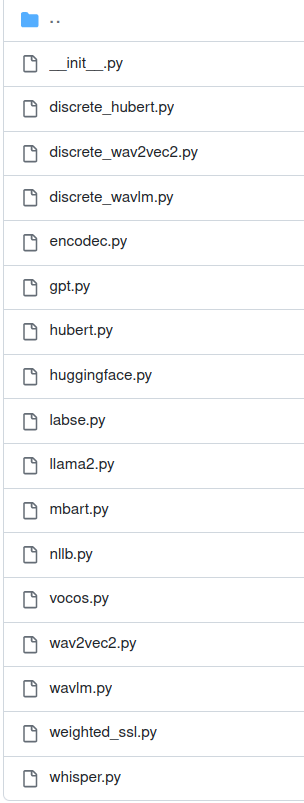

Thanks to the new interfaces, importing new models is now made very easy for users.

## 2. BeamSearch Refactor

In SpeechBrain 1.0, the beam search functionality has undergone significant improvements.

### 2.1 Scorers
One notable enhancement is the separation of the search process from the scoring process.

Below is a comparison of how to call the `test_search` function in the YAML files:

**Old Code:**

In [ ]:
 test_search: !new:speechbrain.decoders.S2SRNNBeamSearchLM
   embedding: !ref <emb>
   decoder: !ref <dec>
   linear: !ref <seq_lin>
   ctc_linear: !ref <ctc_lin>
   language_model: !ref <lm_model>
   bos_index: !ref <bos_index>
   eos_index: !ref <eos_index>
   blank_index: !ref <blank_index>
   min_decode_ratio: !ref <min_decode_ratio>
   max_decode_ratio: !ref <max_decode_ratio>
   beam_size: !ref <test_beam_size>
   eos_threshold: !ref <eos_threshold>
   using_max_attn_shift: !ref <using_max_attn_shift>
   max_attn_shift: !ref <max_attn_shift>
   coverage_penalty: !ref <coverage_penalty>
   lm_weight: !ref <lm_weight>
   ctc_weight: !ref <ctc_weight_decode>
   temperature: !ref <temperature>
   temperature_lm: !ref <temperature_lm>

**New Code:**

In [ ]:
# Scorer
coverage_scorer: !new:speechbrain.decoders.scorer.CoverageScorer
   vocab_size: !ref <output_neurons>

rnnlm_scorer: !new:speechbrain.decoders.scorer.RNNLMScorer
   language_model: !ref <lm_model>
   temperature: !ref <temperature_lm>

scorer: !new:speechbrain.decoders.scorer.ScorerBuilder
   full_scorers: [!ref <rnnlm_scorer>,
                  !ref <coverage_scorer>]
   weights:
      rnnlm: !ref <lm_weight>
      coverage: !ref <coverage_penalty>


test_search: !new:speechbrain.decoders.S2SRNNBeamSearcher
   embedding: !ref <emb>
   decoder: !ref <dec>
   linear: !ref <seq_lin>
   bos_index: !ref <bos_index>
   eos_index: !ref <eos_index>
   min_decode_ratio: !ref <min_decode_ratio>
   max_decode_ratio: !ref <max_decode_ratio>
   beam_size: !ref <test_beam_size>
   eos_threshold: !ref <eos_threshold>
   using_max_attn_shift: !ref <using_max_attn_shift>
   max_attn_shift: !ref <max_attn_shift>
   temperature: !ref <temperature>
   scorer: !ref <scorer>

Users are now required to initially define the list of scorers to be used for rescoring hypotheses during beam search.

In this example, a coverage scorer and a language model based on RNNs are applied. Subsequently, users assemble the scorers with their corresponding weighting factors and integrate them into the `beam_search` function.

This approach enhances the overall process, making it more elegant, cleaner, transparent, and easy to modify.

If you want to return `topk` ASR hypotheses, you only need to specify `return_topk: True` and the number of `topk` hypotheses to be returned (default 1).
The example bellow illustrates how to do it with the new interface. The output will be a tuple of four elements: `(topk_hyps, topk_lengths, topk_scores, topk_log_probs)`. Please refer to the official documentation for a better understanding of the shapes and meaning of each variables.

In [ ]:
# define your scorers
...

test_search: !new:speechbrain.decoders.S2STransformerBeamSearcher
   # your hyperparams
   ...
   return_topk: True
   topk: 10

### 2.2 New Functionalities

- Pure CTC frame-synchronous beam search is now natively implemented in SpeechBrain v1.0.
- It is very fast and easy to modify.
- Supports various heuristics (e.g., blank skip threshold).
- Supports n-gram rescoring with KenLM integration.
- Works with different types of tokenization (e.g., SentencePiece).
- We provide support for 4 different CTC beam searchers: `CTCBeamSearcher`, `CTCPrefixBeamSearcher`, and `torchaudio` CPU and GPU wrappers.

Here is an example of how to perform CTC beam search with an n-gram language model trained with KenLM.

In the YAML file, you can define the following hyperparameters:


In [ ]:
# Decoding parameters
test_beam_search:
    blank_index: !ref <blank_index>
    beam_size: 100
    beam_prune_logp: -12.0
    token_prune_min_logp: -1.2
    prune_history: True
    topk: 1
    alpha: 1.0
    beta: 0.5
    kenlm_model_path: !ref <lm_path>

In the main function of the training script, you can now initialize the `CTCBeamSearcher` class:

In [ ]:
from speechbrain.decoders.ctc import CTCBeamSearcher

# The vocab_list if a list of each tokens in your vocabulary,
# e.g. ["blank", "a", "b", "c"], make sure to use the correct vocabulary.
vocab_list = ...
test_searcher = CTCBeamSearcher(**hparams["test_beam_search"], vocab_list=vocab_list)

hen, you can use it in the compute_forward method:

In [ ]:
    def compute_forward(self, batch, stage):
        """Forward computations from the waveform batches to the output probabilities."""

        # Forward Computations here
        #....
        #....
        #....
        if stage == sb.Stage.TEST:
            p_tokens = test_searcher(p_ctc, wav_lens)

        return p_ctc, wav_lens, p_tokens

## 3. Data Augmentation Refactor



The data augmentation part now offers much more flexibility.

In the previous version, users had some functions such as `TimeDomainSpecAugment` with limited controls over the types of augmentations to use:

**Old Code:**

In [ ]:
augmentation: !new:speechbrain.lobes.augment.TimeDomainSpecAugment
    sample_rate: !ref <sample_rate>
    speeds: [95, 100, 105]

In the new version, the augmentation part and the augmenters are disentangled. First, you need to define the data augmentation functions. In this example, we want to perform speed change, frequency dropout, and chunk dropout.

Then, you can combine the augmentation functions with the `Augmenter` class. This class can manage various functionalities, such as applying a random number of augmentation functions, applying augmentations multiple times, whether to apply them in parallel or in sequence, etc. This provides more flexibility and ensures a diverse range of generated data.

**New Code:**

In [ ]:
# Speed perturbation
speed_changes: [95, 100, 105]  # List of speed changes for time-stretching

speed_perturb: !new:speechbrain.augment.time_domain.SpeedPerturb
    orig_freq: !ref <sample_rate>
    speeds: !ref <speed_changes>

# Frequency drop: randomly drops a number of frequency bands to zero.
drop_freq_low: 0  # Min frequency band dropout probability
drop_freq_high: 1  # Max frequency band dropout probability
drop_freq_count_low: 1  # Min number of frequency bands to drop
drop_freq_count_high: 3  # Max number of frequency bands to drop
drop_freq_width: 0.05  # Width of frequency bands to drop

drop_freq: !new:speechbrain.augment.time_domain.DropFreq
    drop_freq_low: !ref <drop_freq_low>
    drop_freq_high: !ref <drop_freq_high>
    drop_freq_count_low: !ref <drop_freq_count_low>
    drop_freq_count_high: !ref <drop_freq_count_high>
    drop_freq_width: !ref <drop_freq_width>

# Time drop: randomly drops a number of temporal chunks.
drop_chunk_count_low: 1  # Min number of audio chunks to drop
drop_chunk_count_high: 5  # Max number of audio chunks to drop
drop_chunk_length_low: 1000  # Min length of audio chunks to drop
drop_chunk_length_high: 2000  # Max length of audio chunks to drop

drop_chunk: !new:speechbrain.augment.time_domain.DropChunk
    drop_length_low: !ref <drop_chunk_length_low>
    drop_length_high: !ref <drop_chunk_length_high>
    drop_count_low: !ref <drop_chunk_count_low>
    drop_count_high: !ref <drop_chunk_count_high>

# Augmenter: Combines previously defined augmentations to perform data augmentation
wav_augment: !new:speechbrain.augment.augmenter.Augmenter
    parallel_augment: False
    concat_original: False
    repeat_augment: 1
    shuffle_augmentations: False
    min_augmentations: 3
    max_augmentations: 3
    augment_prob: 1.0
    augmentations: [
        !ref <speed_perturb>,
        !ref <drop_freq>,
        !ref <drop_chunk>]

The code in the new version is more verbose than the previous version but provides much more control, flexibility, and transparency.

## 4. Brain Class Refactor
In SpeechBrain 1.0, we implemented several changes in the Brain Class, leading to various benefits: enhanced stability with auto mixed precision, resulting in a significant speedup in many recipes; faster training with Distributed Data Parallel; and improved code reusability.

However, these enhancements required some minor modifications to the class to accommodate the new features. As a consequence, some changes may break old SpeechBrain recipes. To address this issue, we have updated all SpeechBrain recipes to align with the latest changes.

### New Interface for Auto Mixed Precision

All flags such as `--auto_mix_prec` and `--bfloat16_mix_prec` have been deprecated in favor of a single flag, `--precision`. With this flag, you only need to specify the dtype you want, and the system will automatically convert your model and data to the right precision. For example, switching to floating point 16 involves specifying `--precision=fp16` in your YAML or terminal. The same applies to floating point 32 and bfloat 16: `--precision=fp32` and `--precision=bf16`. In your YAML, it only requires adding a new key entry and the associated value:

In [ ]:
precision: fp32 # could have been fp16 or bf16

### Refactoring of the `fit_batch` function

After a careful analysis of our recipes, we discovered that the `fit_batch` function was inappropriate in many scenarios. Indeed, many recipes are redefining this function to add support for multiple optimizers or to freeze them, or they are redefining this function for no specific reasons. In those latter cases, some key components of `fit_batch` were removed, such as the support of auto mixed precision. Additionally, as they were redefining the function, some new changes in `fit_batch` from `speechbrain.core.Brain` were not backpropagated in the recipes, thus leading to inconsistencies for the end user.

To better understand, let's dive into the old and new code.

**Old Code:**

In [ ]:
def fit_batch(self, batch):
    """Fit one batch, override to do multiple updates.

    The default implementation depends on a few methods being defined
    with a particular behavior:

    * ``compute_forward()``
    * ``compute_objectives()``

    Also depends on having optimizers passed at initialization.

    Arguments
    ---------
    batch : list of torch.Tensors
        Batch of data to use for training. Default implementation assumes
        this batch has two elements: inputs and targets.

    Returns
    -------
    detached loss
    """
    valid_loss = False

    # Managing automatic mixed precision
    if self.auto_mix_prec:
        with torch.autocast(device_type=torch.device(self.device).type):
            outputs = self.compute_forward(batch, Stage.TRAIN)

        # Losses are excluded from mixed precision to avoid instabilities
        loss = self.compute_objectives(outputs, batch, Stage.TRAIN)

        if self.check_gradients(loss):
            valid_loss = True
            self.valid_step += 1

        should_step = self.valid_step % self.grad_accumulation_factor == 0
        if valid_loss:
            with self.no_sync(not should_step):
                self.scaler.scale(
                    loss / self.grad_accumulation_factor
                ).backward()
            if should_step:
                self.scaler.unscale_(self.optimizer)
                self.scaler.step(self.optimizer)
                self.scaler.update()
                self.zero_grad()
                self.optimizer_step += 1
    else:
        if self.bfloat16_mix_prec:
            with torch.autocast(
                device_type=torch.device(self.device).type,
                dtype=torch.bfloat16,
            ):
                outputs = self.compute_forward(batch, Stage.TRAIN)
                loss = self.compute_objectives(outputs, batch, Stage.TRAIN)
        else:
            outputs = self.compute_forward(batch, Stage.TRAIN)
            loss = self.compute_objectives(outputs, batch, Stage.TRAIN)

        if self.check_gradients(loss):
            valid_loss = True
            self.valid_step += 1

        should_step = self.valid_step % self.grad_accumulation_factor == 0
        if valid_loss:
            with self.no_sync(not should_step):
                (loss / self.grad_accumulation_factor).backward()
            if should_step:
                self.optimizer.step()
                self.zero_grad()
                self.optimizer_step += 1

    self.on_fit_batch_end(batch, outputs, loss, should_step)
    return loss.detach().cpu()

**New Code:**

In [ ]:
def fit_batch(self, batch):
      """Fit one batch, override to do multiple updates.

      The default implementation depends on a few methods being defined
      with a particular behavior:

      * ``compute_forward()``
      * ``compute_objectives()``
      * ``optimizers_step()``

      Also depends on having optimizers passed at initialization.

      Arguments
      ---------
      batch : list of torch.Tensors
          Batch of data to use for training. Default implementation assumes
          this batch has two elements: inputs and targets.

      Returns
      -------
      detached loss
      """
      amp = AMPConfig.from_name(self.precision)
      should_step = (self.step % self.grad_accumulation_factor) == 0

      with self.no_sync(not should_step):
          if self.use_amp:
              with torch.autocast(
                  dtype=amp.dtype, device_type=torch.device(self.device).type,
              ):
                  outputs = self.compute_forward(batch, sb.Stage.TRAIN)
                  loss = self.compute_objectives(
                      outputs, batch, sb.Stage.TRAIN
                  )
          else:
              outputs = self.compute_forward(batch, sb.Stage.TRAIN)
              loss = self.compute_objectives(outputs, batch, sb.Stage.TRAIN)

          scaled_loss = self.scaler.scale(
              loss / self.grad_accumulation_factor
          )
          self.check_loss_isfinite(scaled_loss)
          scaled_loss.backward()

      if should_step:
          self.optimizers_step()

      self.on_fit_batch_end(batch, outputs, loss, should_step)
      return loss.detach().cpu()

As you can see, the new `fit_batch` function contains fewer lines of code, making it easier to understand and modify. We first simplified our auto mixed precision interface thanks to the new `--precision` flag system. Additionally, we defined a new function `optimizers_step` aimed at handling the optimizer logic during backpropagation. Note that, by default, `self.scaler.scale` is not activated, and it will result in returning the loss unchanged. This line will only be useful when using `--precision=fp16` and will scale the loss to avoid NaNs.

The `optimizers_step` function is defined as follows:

In [ ]:
def optimizers_step(self):
    """Performs a step of gradient descent on the optimizers. This method is called every
    ``grad_accumulation_factor`` steps."""
    # 1. get the valid optimizers, i.e., the ones that are not frozen during this step
    valid_optimizers = self.freeze_optimizers(self.optimizers_dict)

    # 2. unscale the gradients of the valid optimizers
    for opt in valid_optimizers.values():
        self.scaler.unscale_(opt)

    # 3. clip gradients
    # We are clipping this way because clipping on self.modules.parameters()
    # can leads to NaN/Inf gradients norm as doing the concatenation
    # of all parameters in a single vector can lead to overflow/underflow.
    for opt in valid_optimizers.values():
        torch.nn.utils.clip_grad_norm_(
            opt.param_groups[0]["params"], self.max_grad_norm
        )

    # no need to activate this flag if you are in fp16
    # since GradScaler is automatically handling the nonfinite gradients
    if not self.scaler.is_enabled() and self.skip_nonfinite_grads:
        self.check_gradients()

    # 4. step the valid optimizers
    # If the scaler is disable, it simply calls optimizer.step()
    for opt in valid_optimizers.values():
        self.scaler.step(opt)

    self.scaler.update()

    for opt in valid_optimizers.values():
        opt.zero_grad(set_to_none=True)

    self.optimizer_step += 1

This new function aims to perform one optimizer step. It first retrieves all the valid optimizers in the current step through `freeze_optimizers` and then proceeds with the necessary steps such as unscaling, gradient clipping, etc.

One key point and breaking change is the function `freeze_optimizers`. This function, given a list of optimizers, aims to return those that are valid during the current step. By default, it is defined as follows:

In [ ]:
def freeze_optimizers(self, optimizers):
    """By default, this method returns the passed optimizers.
    Override this method if you want to freeze some optimizers
    during training. To do so, return a of active optimizers.
    """
    return optimizers

However, in many recipes, such as in ASR tasks, you may want to redefine this function to integrate a mechanism for freezing optimizers. For instance, you may want to do:

In [ ]:
def freeze_optimizers(self, optimizers):
    """Freezes the wav2vec2 optimizer according to the warmup steps"""
    valid_optimizers = {}
    if not self.hparams.freeze_whisper:
        # Here we added a warmup to the CTC encoder to make sure that
        # it does not break the whisper with too large gradients.
        if self.optimizer_step > self.hparams.warmup_steps:
            valid_optimizers["whisper_optimizer"] = optimizers[
                "whisper_optimizer"
            ]
    valid_optimizers["model_optimizer"] = optimizers["model_optimizer"]
    return valid_optimizers

Where basically, you dynamically change the optimizers dict based on what you want to do. In this case, if `self.hparams.freeze_whisper` is not `None` and `self.optimizer_step > self.hparams.warmup_steps` is `True`, you add `whisper_optimizer` to the list of `valid_optimizers`. This way, you don't have to redefine `fit_batch`. You only need to modify `freeze_optimizers` to accommodate your needs.

The only breaking change is in the function `init_optimizers`, in which you now need to add the dictionary of optimizers.

**Old Code:**

In [ ]:
def init_optimizers(self):
    "Initializes the whisper optimizer and model optimizer"
    self.whisper_optimizer = self.hparams.whisper_opt_class(
        self.modules.whisper.parameters()
    )

    self.model_optimizer = self.hparams.model_opt_class(
        self.hparams.model.parameters()
    )

    if self.checkpointer is not None:
        self.checkpointer.add_recoverable(
            "whisper_opt", self.whisper_optimizer
        )
        self.checkpointer.add_recoverable("modelopt", self.model_optimizer)

**New Code:**

In [ ]:
def init_optimizers(self):
    "Initializes the whisper optimizer and model optimizer"
    self.whisper_optimizer = self.hparams.whisper_opt_class(
        self.modules.whisper.parameters()
    )

    self.model_optimizer = self.hparams.model_opt_class(
        self.hparams.model.parameters()
    )

    # save the optimizers in a dictionary
    # the key will be used in `freeze_optimizers()`
    self.optimizers_dict = {
        "model_optimizer": self.model_optimizer,
        "whisper_optimizer": self.whisper_optimizer,
    }

    if self.checkpointer is not None:
        self.checkpointer.add_recoverable(
            "whisper_opt", self.whisper_optimizer
        )
        self.checkpointer.add_recoverable("modelopt", self.model_optimizer)

So now, you need to specify `self.optimizers_dict` if you want to utilize multiple optimizers.

Thanks to these new changes, you do not need to redefine the `fit_batch` function. You only need to modify `freeze_optimizers` if you want to add dynamic freezing.

## 5. Inference Interfaces Refactor
In SpeechBrain 1.0, the inference interfaces have been separated into smaller libraries.

**Old Code:**

In [ ]:
from speechbrain.pretrained import EncoderDecoderASR

asr_model = EncoderDecoderASR.from_hparams(source="speechbrain/asr-conformer-transformerlm-librispeech", savedir="pretrained_models/asr-transformer-transformerlm-librispeech")
asr_model.transcribe_file("speechbrain/asr-conformer-transformerlm-librispeech/example.wav")

**New Code:**

In [ ]:
from speechbrain.inference.ASR import EncoderDecoderASR

asr_model = EncoderDecoderASR.from_hparams(source="speechbrain/asr-conformer-transformerlm-librispeech", savedir="pretrained_models/asr-transformer-transformerlm-librispeech")
asr_model.transcribe_file("speechbrain/asr-conformer-transformerlm-librispeech/example.wav")

The interfaces are now all in `speechbrain.inference`, with a different library for each specific task:

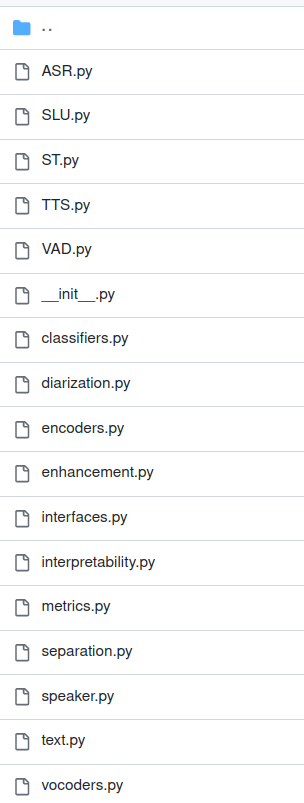

That's all!

# **About SpeechBrain**
- Website: https://speechbrain.github.io/
- Code: https://github.com/speechbrain/speechbrain/
- HuggingFace: https://huggingface.co/speechbrain/


# **Citing SpeechBrain**
Please, cite SpeechBrain if you use it for your research or business.

```bibtex
@misc{speechbrain,
  title={{SpeechBrain}: A General-Purpose Speech Toolkit},
  author={Mirco Ravanelli and Titouan Parcollet and Peter Plantinga and Aku Rouhe and Samuele Cornell and Loren Lugosch and Cem Subakan and Nauman Dawalatabad and Abdelwahab Heba and Jianyuan Zhong and Ju-Chieh Chou and Sung-Lin Yeh and Szu-Wei Fu and Chien-Feng Liao and Elena Rastorgueva and François Grondin and William Aris and Hwidong Na and Yan Gao and Renato De Mori and Yoshua Bengio},
  year={2021},
  eprint={2106.04624},
  archivePrefix={arXiv},
  primaryClass={eess.AS},
  note={arXiv:2106.04624}
}
```